# Mar 2024 Ontario

> Use NLP to sort the entries in the 'Other Interests' column into categories.

In [1]:
# First, let's load the data and inspect the first few rows
import pandas as pd

data = pd.read_csv('cleaned2_ontario.csv')

# Create the new columns

keywords = {
    'Archaeology/Anthropology': ['archaeology', 'anthropology'],
    'Religious Studies': ['religion', 'religious', 'theology', 'biblic'],
    'Family History': ['family', 'ancestors', 'genealogy', 'parent', 'sister', 'brother', 'home children'],
    'Local History': ['local', 'railway', 'community'],
    'Philosophy' : ['philosophy'],
    'Social Studies': ['social', 'society', 'studies', 'ethnic', 'humanities', 'sexuality', 'youth', 'equality'],
    'Social Science': ['psychotherapy'],
    'Music': ['music'],
    'Science': ['engineering', 'physics', 'chemistry', 'biology', 'mechanical', 'civil', 'architecture'],
    'Military': ['military'],
    'Police': ['rcmp', 'police'],
    'Art': ['art','arts','craft']
}
for category, words in keywords.items():
    for word in words:
        data[category] = data['Other Interest'].str.contains(word, case=False, na=False)

# Convert boolean to int
for category in keywords.keys():
    data[category] = data[category].astype(int)

# Drop the 'Other Interest' column
data = data.drop(columns=['Other Interest'])


Now, the data is ready for further analysis or modeling with a more structured representation of the interests.

> Use NLP to sort the entries in the 'Other Identifiers' column into categories.

In [2]:
# First, we need to replace the 'Other Identifications' entries with the respective categories.
# I'll follow the similar text matching approach explained before:

# I'll create a keyword mapping to categories
identifiers_keywords = {
    'Retired': ['retired'],
    'Historical Society': ['historical society'],
    'Independent Researcher': ['independant', 'independent'],
    'Scholar': ['scholar'],
    'Editor': ['editor'],
    'Writer': ['writer'],
    'Historian': ['historian'],
    'Journalist': ['journalist'],
    'Researcher': ['researcher', 'research'],
    'Cinematographer': ['cinematographer','youtuber'],
    'Enthusiast' : ['enthusiast', 'amateur'],
    'Law Officer' : ['rcmp','police']
}

# Create the new columns for each category
for identifier, words in identifiers_keywords.items():
    for word in words:
        data[identifier] = data['Other Identification'].str.contains(word, case=False, na=False)

# Convert boolean to int
for identifier in identifiers_keywords.keys():
    data[identifier] = data[identifier].astype(int)

# Drop the 'Other Identification' column
data = data.drop(columns=['Other Identification'])

Now, the dataframe is adjusted for further processing or modeling. The 'Other Identifiers' is now broken down to specific categories which should be more insightful and manageable for analysis.

> Determine the columns that have to do with occupations and the columns that have to do with interests

In [3]:
occupations_columns = [
    'Genealogical researcher', 
    'GLAM professional', 
    'Government employee', 
    'Legal researcher', 
    'Member of the general public', 
    'Post-secondary researcher', 
    'Student', 
    'Teacher', 
    'Retired',
    'Historical Society',
    'Independent Researcher',
    'Scholar',
    'Editor',
    'Writer',
    'Historian',
    'Journalist',
    'Cinematographer',
    'Enthusiast',
    'Researcher',
    'Law Officer'
]



interests_columns = [
    'Computer Science',
    'Digital Humanities',	
    'Education',	
    'Environment/Climate',
    'Gender Studies',
    'Genealogy',
    'Geography',
    'Health',
    'History',
    'Indigenous Land Claims',
    'Indigenous Studies',
    'Information Science',
    'Law',
    'Linguistics',
    'Literature',
    'Political Science',
    'Archaeology/Anthropology',
    'Religious Studies',
    'Family History',
    'Local History',
    'Social Studies',
    'Social Science',
    'Philosophy',
    'Music',
    'Science',
    'Art',
    'Police',
    'Military'
]

occupations_columns.sort()

interests_columns.sort()

> Create a bar chart showing the count of the different occupations

In [4]:
# The first step is to get the count of each occupation. 
# The occupations_columns contains the names of the occupation columns in the dataset.
occupation_counts = data[occupations_columns].sum()

occupation_counts.sort_values(ascending=False)

Member of the general public    915
Genealogical researcher         867
Student                         497
Post-secondary researcher       308
GLAM professional               127
Teacher                         103
Legal researcher                 91
Government employee              79
Researcher                       55
Historian                        39
Retired                          33
Writer                           14
Editor                            7
Historical Society                7
Independent Researcher            7
Journalist                        4
Enthusiast                        4
Law Officer                       1
Scholar                           1
Cinematographer                   0
dtype: int64

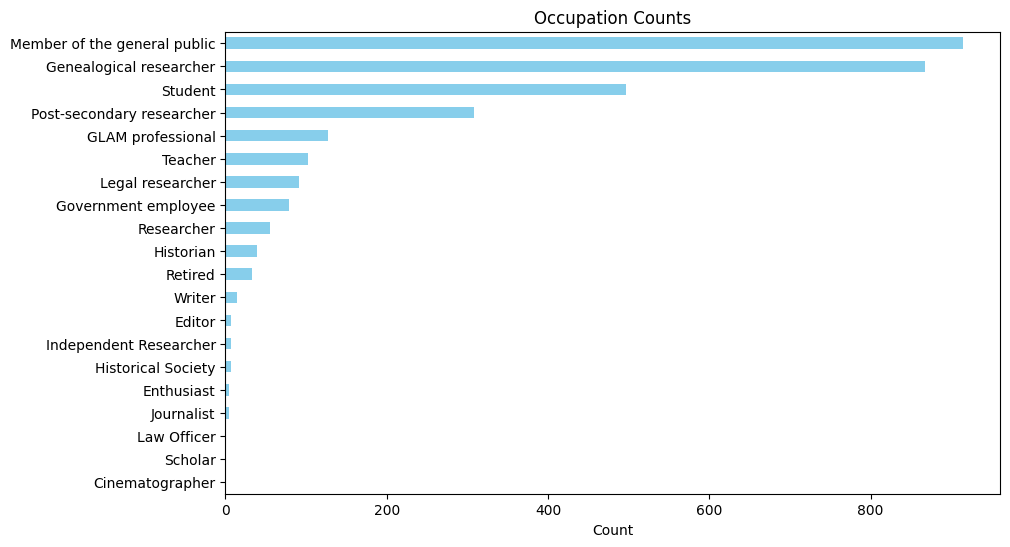

In [5]:
# Now, let's plot a bar chart of the occupation counts
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6)) 
occupation_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Occupation Counts')
plt.show()

> Create a bar chart showing the count of the different interests

In [6]:
# The first step is to get the count of each interest. 
# The interests_columns contains the names of the interests columns in the dataset.
interest_counts = data[interests_columns].sum()

interest_counts.sort_values(ascending=False)

History                     1444
Genealogy                   1019
Indigenous Studies           278
Geography                    238
Law                          200
Education                    173
Indigenous Land Claims       172
Digital Humanities           153
Literature                   152
Political Science            150
Environment/Climate          125
Health                        86
Information Science           74
Gender Studies                73
Computer Science              62
Linguistics                   55
Science                       10
Local History                  4
Archaeology/Anthropology       4
Military                       3
Music                          2
Family History                 2
Philosophy                     1
Social Science                 1
Social Studies                 1
Police                         0
Art                            0
Religious Studies              0
dtype: int64

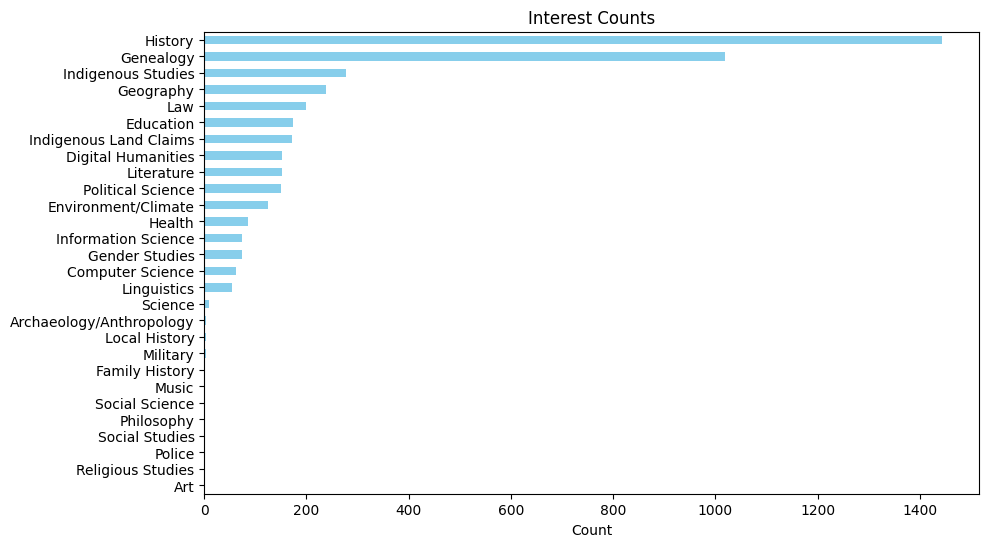

In [7]:
# Now, let's plot a bar chart of the interest counts

plt.figure(figsize=(10,6)) 
interest_counts.sort_values().plot(kind='barh', color='skyblue') 
plt.xlabel('Count')
plt.title('Interest Counts')
plt.show()

> plot the entire dataset of people on a map displaying the counts per city

In [8]:
# Now, let's group the data by city and get the count of people in each city
people_counts = data.groupby(['city', 'latitude', 'longitude']).size().reset_index(name='counts')
people_counts

,city,latitude,longitude,counts
0,Ajax,43.8501,-79.0329,25
1,Alliston,44.1501,-79.8663,6
2,Amherstburg,42.1001,-83.0999,1
3,Ancaster,43.2181,-79.9872,6
4,Arnprior,45.4334,-76.3494,1
...,...,...,...,...
251,Willowdale,43.7667,-79.3991,8
252,Windsor,42.2949,-83.0520,1
253,Windsor,42.3001,-83.0165,24
254,Wingham,43.8879,-81.3114,1


In [9]:
# Import the folium package
import folium

# Create an initial map, we are going to start with a blank map centered around (0,0)
m = folium.Map(location=[0, 0], zoom_start=1)

# Using folium.Circle, add a cirle for each city in people_counts DataFrame
# The size of the circle corresponds to the count of people in the city
for _, row in people_counts.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=float(row['counts']) * 1000,  # Multiply by 1000 to make the circles visible
        fill=True,
        tooltip=f"{row['city']}: {row['counts']} people"
    ).add_to(m)

# Display the map
m

> what are the most common interests for each occupation in the dataset

In [10]:
# For each occupation, let's find out the most common interest
occupation_interests = {}

for occupation in occupations_columns:
    # Calculate the sum of people with this occupation having each interest
    coi = data[data[occupation] == 1][interests_columns].sum()
    # Find the most common interest
    most_common_interest = coi.idxmax()
    occupation_interests[occupation] = most_common_interest

occupation_interests

{'Cinematographer': 'Archaeology/Anthropology',
 'Editor': 'History',
 'Enthusiast': 'History',
 'GLAM professional': 'History',
 'Genealogical researcher': 'Genealogy',
 'Government employee': 'History',
 'Historian': 'History',
 'Historical Society': 'History',
 'Independent Researcher': 'History',
 'Journalist': 'History',
 'Law Officer': 'Computer Science',
 'Legal researcher': 'Law',
 'Member of the general public': 'History',
 'Post-secondary researcher': 'History',
 'Researcher': 'History',
 'Retired': 'History',
 'Scholar': 'History',
 'Student': 'History',
 'Teacher': 'History',
 'Writer': 'History'}

> plot the count of all interests for all occupations on a heat map

In [11]:
# First, we need to recreate the relevant segments of the dataframe for occupations and interests
occupations_data = data[occupations_columns]
interests_data = data[interests_columns]

# Count the occurrences of interests for each occupation
occupation_interest_counts = {}
for occupation in occupations_columns:
    occupation_data = data[data[occupation] == 1]
    for interest in interests_columns:
        if occupation in occupation_interest_counts:
            occupation_interest_counts[occupation][interest] = occupation_data[interest].sum()
        else:
            occupation_interest_counts[occupation] = {interest: occupation_data[interest].sum()}

# Convert the dictionary to a pandas DataFrame
occupation_interest_df = pd.DataFrame.from_dict(occupation_interest_counts, orient='index')

# Show the dataframe
occupation_interest_df

,Archaeology/Anthropology,Art,Computer Science,Digital Humanities,Education,Environment/Climate,Family History,Gender Studies,Genealogy,Geography,...,Local History,Military,Music,Philosophy,Police,Political Science,Religious Studies,Science,Social Science,Social Studies
Cinematographer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Editor,0,0,0,5,2,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
Enthusiast,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
GLAM professional,0,0,4,25,12,6,0,10,37,9,...,1,0,0,0,0,9,0,0,0,0
Genealogical researcher,0,0,13,37,23,16,1,7,688,79,...,1,1,0,0,0,25,0,0,0,0
Government employee,0,0,5,10,6,7,0,8,22,11,...,0,0,0,0,0,10,0,0,0,0
Historian,0,0,2,6,3,1,0,1,8,3,...,0,1,0,0,0,2,0,0,0,0
Historical Society,0,0,0,1,1,0,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
Independent Researcher,0,0,0,0,0,1,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
Journalist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


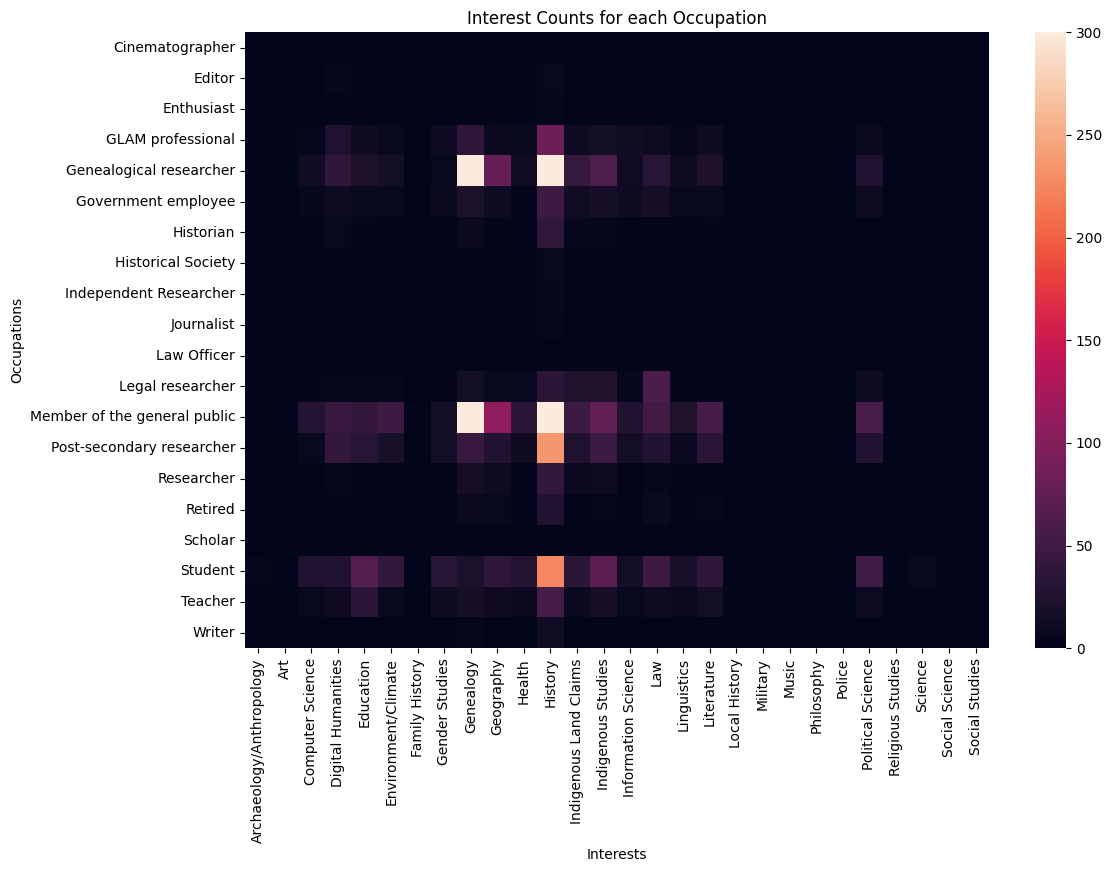

In [12]:
# Now, we will plot a heat map using the seaborn library
import seaborn as sns

# Increase the size of the figure for better visibility
plt.figure(figsize=(12,8))

# Plot the heatmap
sns.heatmap(occupation_interest_df, annot=False, vmin=0, vmax=300)

# Set the labels and title for the plot
plt.xlabel('Interests')
plt.ylabel('Occupations')
plt.title('Interest Counts for each Occupation')

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78bfc222-b866-4a43-b8a8-c2a8d5467ce5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>